# Exercise Instructions

## Daily Temperatures

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

- Additional examples on weather and flights below

In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
temp = data.sf_temps()

In [3]:
temp.index = pd.to_datetime(temp.date)

In [4]:
temp.head()

,temp,date
date,,
2010-01-01 00:00:00,47.80,2010-01-01 00:00:00
2010-01-01 01:00:00,47.40,2010-01-01 01:00:00
2010-01-01 02:00:00,46.90,2010-01-01 02:00:00
2010-01-01 03:00:00,46.50,2010-01-01 03:00:00
2010-01-01 04:00:00,46.00,2010-01-01 04:00:00


Resample by the day and take the average temperature. Visualize the average temperature over time.
 - Resample
 - Avg Temp

Text(0.5, 1.0, 'Avg. Daily Temp')

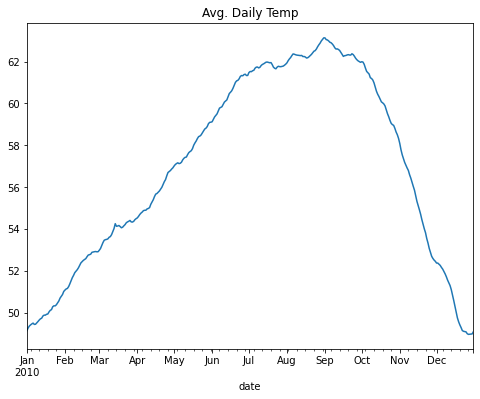

In [5]:
temp.resample('D').temp.mean().plot()
plt.title("Avg. Daily Temp")

Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 1.0, 'Min Daily Temp')

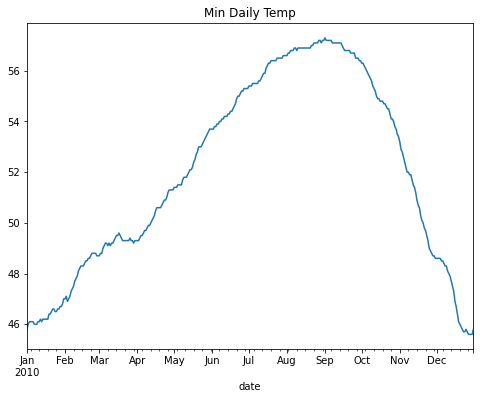

In [6]:
temp.resample('D').temp.min().plot()
plt.title("Min Daily Temp")

Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 1.0, 'Max Daily Temp')

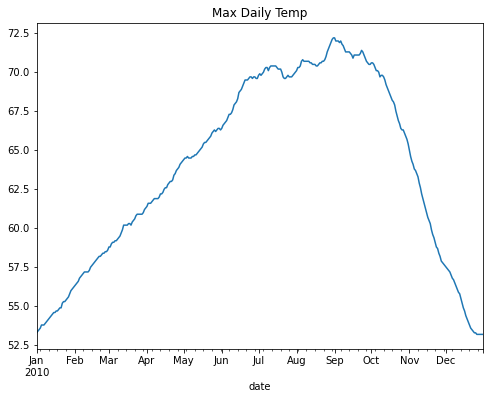

In [7]:
temp.resample('D').temp.max().plot()
plt.title("Max Daily Temp")

Which month is the coldest, on average?

In [8]:
temp.resample('M').temp.mean().idxmin().month_name()

'January'

Which month has the highest average temperature?

In [9]:
temp.resample('M').temp.mean().idxmax().month_name()

'September'

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [10]:
temp.resample('D').temp.agg(
['min','max']).assign(
temp_range = lambda row: row['max']-row['min']).resample('M').temp_range.mean().idxmax().month_name()

'September'

Bonus: plot with 3 lines

Text(0.5, 1.0, 'Min, Mean, Max Daily Temp')

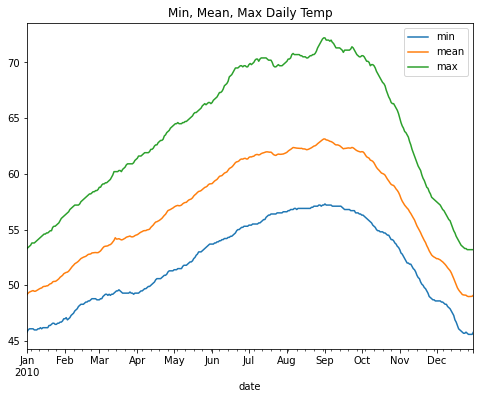

In [11]:
temp.resample('D').temp.agg(
['min','mean','max']).plot()
plt.title("Min, Mean, Max Daily Temp")

## Seattle Weather Exercises
Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [12]:
wx = data.seattle_weather()

In [13]:
wx.index=pd.to_datetime(wx.date)
wx=wx.sort_index()

In [14]:
wx.head()

,date,precipitation,temp_max,temp_min,wind,weather
date,,,,,,
2012-01-01,2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,2012-01-05,1.30,8.90,2.80,6.10,rain


Which year and month combination has the highest amount of precipitation?

In [15]:
print("Highest amoung of precipitation was on :",wx.groupby([wx.index.year, wx.index.month]).precipitation.sum().idxmax())

Highest amoung of precipitation was on : (2015, 12)


Visualize the amount of monthly precipitation over time

Text(0.5, 1.0, 'Preciptation by Month')

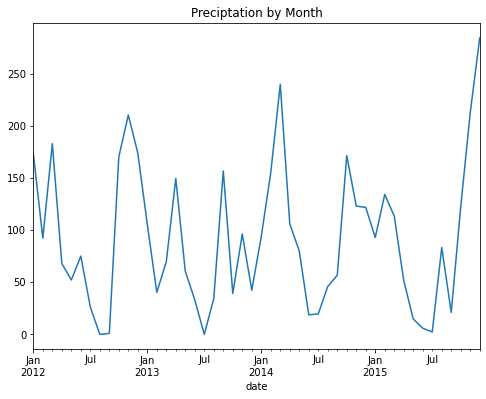

In [16]:
wx.resample('M').precipitation.sum().plot()
plt.title('Preciptation by Month')

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Wind Avg. by Month')

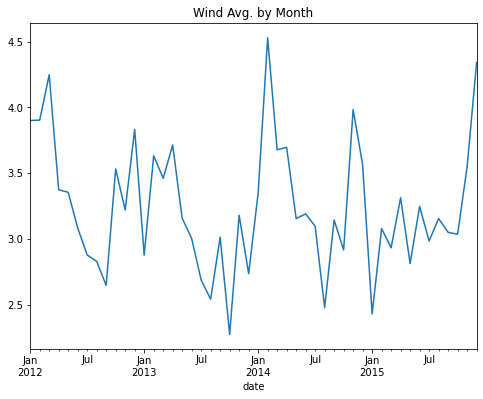

In [17]:
wx.resample('M').wind.mean().plot()
plt.title('Wind Avg. by Month')

<AxesSubplot:title={'center':'Monthly Precipitation Totals'}, xlabel='date'>

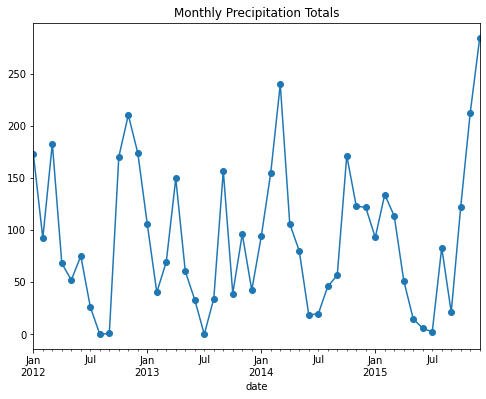

In [18]:
# Second Attempt - trying something esle
wx.resample('M').precipitation.sum().plot(marker='o', title='Monthly Precipitation Totals')

Which year-month combination is the windiest?

In [19]:
print('The windiest month was in :', wx.resample('M').wind.mean().idxmax().strftime('%b-%Y'))

The windiest month was in : Feb-2014


What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [20]:
print('The sunniest year was ', (wx.weather=='sun').resample('Y').sum().idxmax().year)

The sunniest year was  2014


In which month does it rain the most?

In [21]:
print('The rainiest month was ',(wx.weather=='rain').resample('M').sum().idxmax().month_name())

The rainiest month was  November


Which month has the most number of days with a non-zero amount of precipitation?

In [22]:
print('The month with the most number of days of non-zero percipitation is ',(wx.precipitation>0).resample('M').sum().idxmax().month_name())

The month with the most number of days of non-zero percipitation is  December


## Flight Data
- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [23]:
flight = data.flights_20k()
flight.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [24]:
flight.index=pd.to_datetime(flight.date)
flight = flight.sort_index()

Convert any negative delays to 0.

In [25]:
flight.delay = np.where(flight.delay<0, 0, flight.delay)

In [26]:
flight.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
509        1
178        1
245        1
222        1
196        1
Name: delay, Length: 194, dtype: int64

Which hour of the day has the highest average delay?

In [27]:
print(f'Hour with the highest avg. delay: {flight.groupby([flight.index.hour]).delay.mean().idxmax()}')

Hour with the highest avg. delay: 3


Does the day of the week make a difference in the delay amount?

Text(0.5, 1.0, 'Avg. Delay by Day')

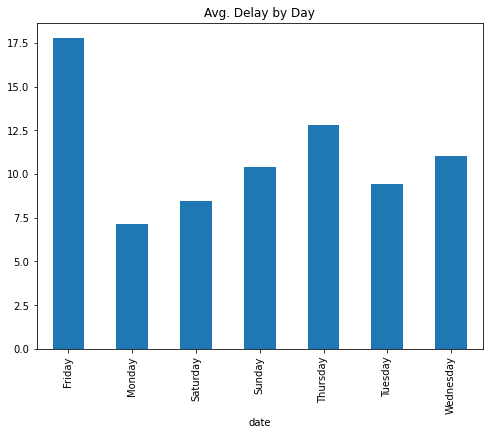

In [28]:
flight.groupby([flight.index.day_name()]).delay.mean().plot.bar()
plt.title('Avg. Delay by Day')

Does the month make a difference in the delay amount?

Text(0.5, 1.0, 'Avg. Delay by Month')

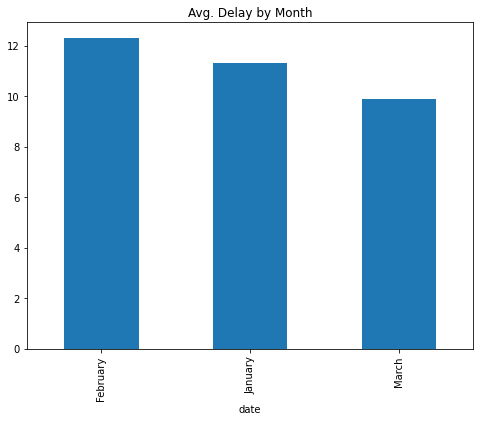

In [29]:
flight.groupby([flight.index.month_name()]).delay.mean().plot.bar()
plt.title('Avg. Delay by Month')

## Bonus Iowa Electricity

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

In [30]:
e=data.iowa_electricity()
e.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [31]:
e.index=pd.to_datetime(e.year)
e=e.sort_index()
e.head()

,year,source,net_generation
year,,,
2001-01-01,2001-01-01,Fossil Fuels,35361
2001-01-01,2001-01-01,Nuclear Energy,3853
2001-01-01,2001-01-01,Renewables,1437
2002-01-01,2002-01-01,Fossil Fuels,35991
2002-01-01,2002-01-01,Nuclear Energy,4574


For each row, calculate the percentage of the year's total that energy source provided.

In [32]:
def get_years_net_gen(row):
    total_gen_year = e[e.index.year==row.name.year].net_generation.sum()
    
    return 100*round(row.net_generation/total_gen_year,3)

In [33]:
e['perc_of_yearly_gen']=e.apply(lambda row: get_years_net_gen(row), axis=1)
e.head()

,year,source,net_generation,perc_of_yearly_gen
year,,,,
2001-01-01,2001-01-01,Fossil Fuels,35361,87.00
2001-01-01,2001-01-01,Nuclear Energy,3853,9.50
2001-01-01,2001-01-01,Renewables,1437,3.50
2002-01-01,2002-01-01,Fossil Fuels,35991,84.60
2002-01-01,2002-01-01,Nuclear Energy,4574,10.80


Lineplot of generation over time, color by source

<AxesSubplot:xlabel='year', ylabel='net_generation'>

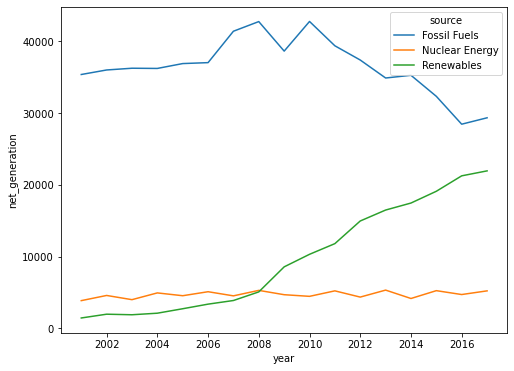

In [34]:
sns.lineplot(data=e.reset_index(drop=True), x='year', y='net_generation', hue='source')

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [35]:
e.reset_index(drop=True).pivot_table(index='source',columns='year', values='net_generation')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

<AxesSubplot:xlabel='year'>

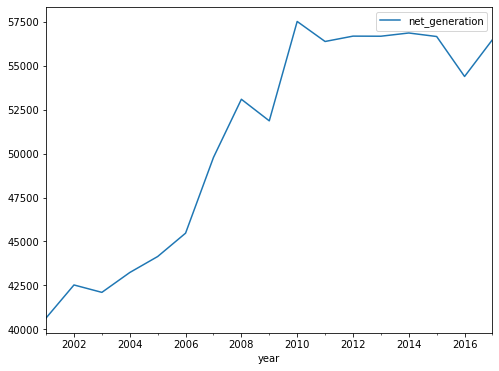

In [36]:
e.reset_index(drop=True).pivot_table(aggfunc='sum', columns='year', values='net_generation').T.plot()

<AxesSubplot:xlabel='year', ylabel='net_generation'>

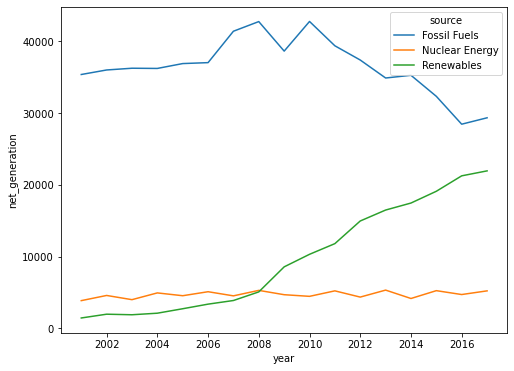

In [37]:
# Second attempt - This should be the same thing as the previous question asking for a linegraph.
sns.lineplot(data=e.reset_index(drop=True), x='year', y='net_generation', hue='source')

Is the total generation increasing over time?
 - How would you control for increasing consumption over time when considering how much energy is coming from each source?
     - Answer: graphs show generation not consumption.  No data on consumption.
 - express each number as a % of the year's total
     - Answered by first question in iowa question set

## sf_temps data set
- Use the sf_temps dataset
- Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
- How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
- Create pretty labels for time plots
- Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [38]:
df= data('sf_temps')
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [39]:
df['temp_bin']=pd.qcut(df.temp, 4, labels=['cold','cool','warm','hot'])
df.temp_bin.value_counts()

cool    2218
cold    2210
hot     2175
warm    2156
Name: temp_bin, dtype: int64

How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [40]:
df.index=pd.to_datetime(df.date)
df.index.name= ""
df.head()

,temp,date,temp_bin
,,,
2010-01-01 00:00:00,47.80,2010-01-01 00:00:00,cold
2010-01-01 01:00:00,47.40,2010-01-01 01:00:00,cold
2010-01-01 02:00:00,46.90,2010-01-01 02:00:00,cold
2010-01-01 03:00:00,46.50,2010-01-01 03:00:00,cold
2010-01-01 04:00:00,46.00,2010-01-01 04:00:00,cold


In [41]:
count_df=(df.groupby([df.index.month_name(),df.temp_bin]).temp_bin.count()).unstack()

In [42]:
count_df['month']=count_df.index

In [43]:
count_df['month_num']=count_df.apply(lambda row: datetime.strptime(row.month, '%B').month, axis=1)

In [44]:
count_df=count_df.sort_values('month_num')

Text(0, 0.5, 'Occurences in Month')

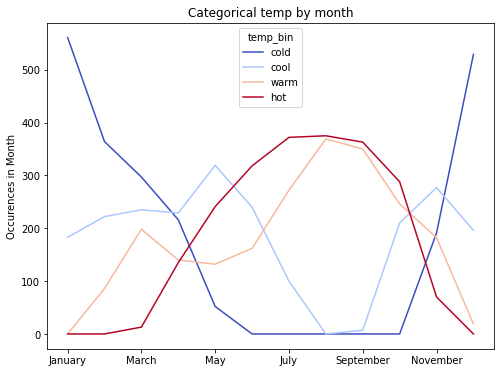

In [45]:
count_df[['cold','cool','warm','hot']].plot(cmap=plt.cm.coolwarm)
plt.title("Categorical temp by month")
plt.ylabel("Occurences in Month")